In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import nan, NAN, NaN
import pycountry

This is the SQL querry used in Athena

```sql
SELECT *
FROM fetches
WHERE date.utc
    BETWEEN '2019-01-01'
        AND '2019-12-31'
        AND parameter = 'pm25'
;
```

In [2]:
def get_full_country(alpha_2_code):
    """Returns the name of a country from the 2-letter ISO code
    """
    try:
        return pycountry.countries.get(alpha_2=alpha_2_code).name
    except AttributeError:
        return NaN

Get the number of rows in the 2019 data set (querried on 2019-04-27)

In [3]:
%%bash
wc ../../data/5ec3d8b2-5b40-40b3-8eb0-343c6d257687.csv

   7580398  124586729 2878638276 ../../data/5ec3d8b2-5b40-40b3-8eb0-343c6d257687.csv


In [4]:
df = pd.read_csv('../../data/5ec3d8b2-5b40-40b3-8eb0-343c6d257687.csv',
                 #nrows=10000
                )
df['country_full_name'] = df.country.apply(get_full_country)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7580397 entries, 0 to 7580396
Data columns (total 14 columns):
date                 object
parameter            object
location             object
value                float64
unit                 object
city                 object
attribution          object
averagingperiod      object
coordinates          object
country              object
sourcename           object
sourcetype           object
mobile               bool
country_full_name    object
dtypes: bool(1), float64(1), object(12)
memory usage: 759.1+ MB


In [6]:
pd.value_counts(df.parameter, dropna=False) # all the the parameters are pm25

pm25    7580397
Name: parameter, dtype: int64

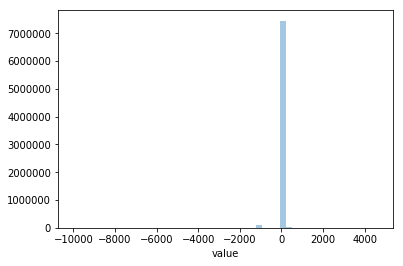

In [7]:
sns.distplot(df.value, kde=False) # look at the distribution of values, some values are < 0

Distribution of values for each country before removing rows <= 0

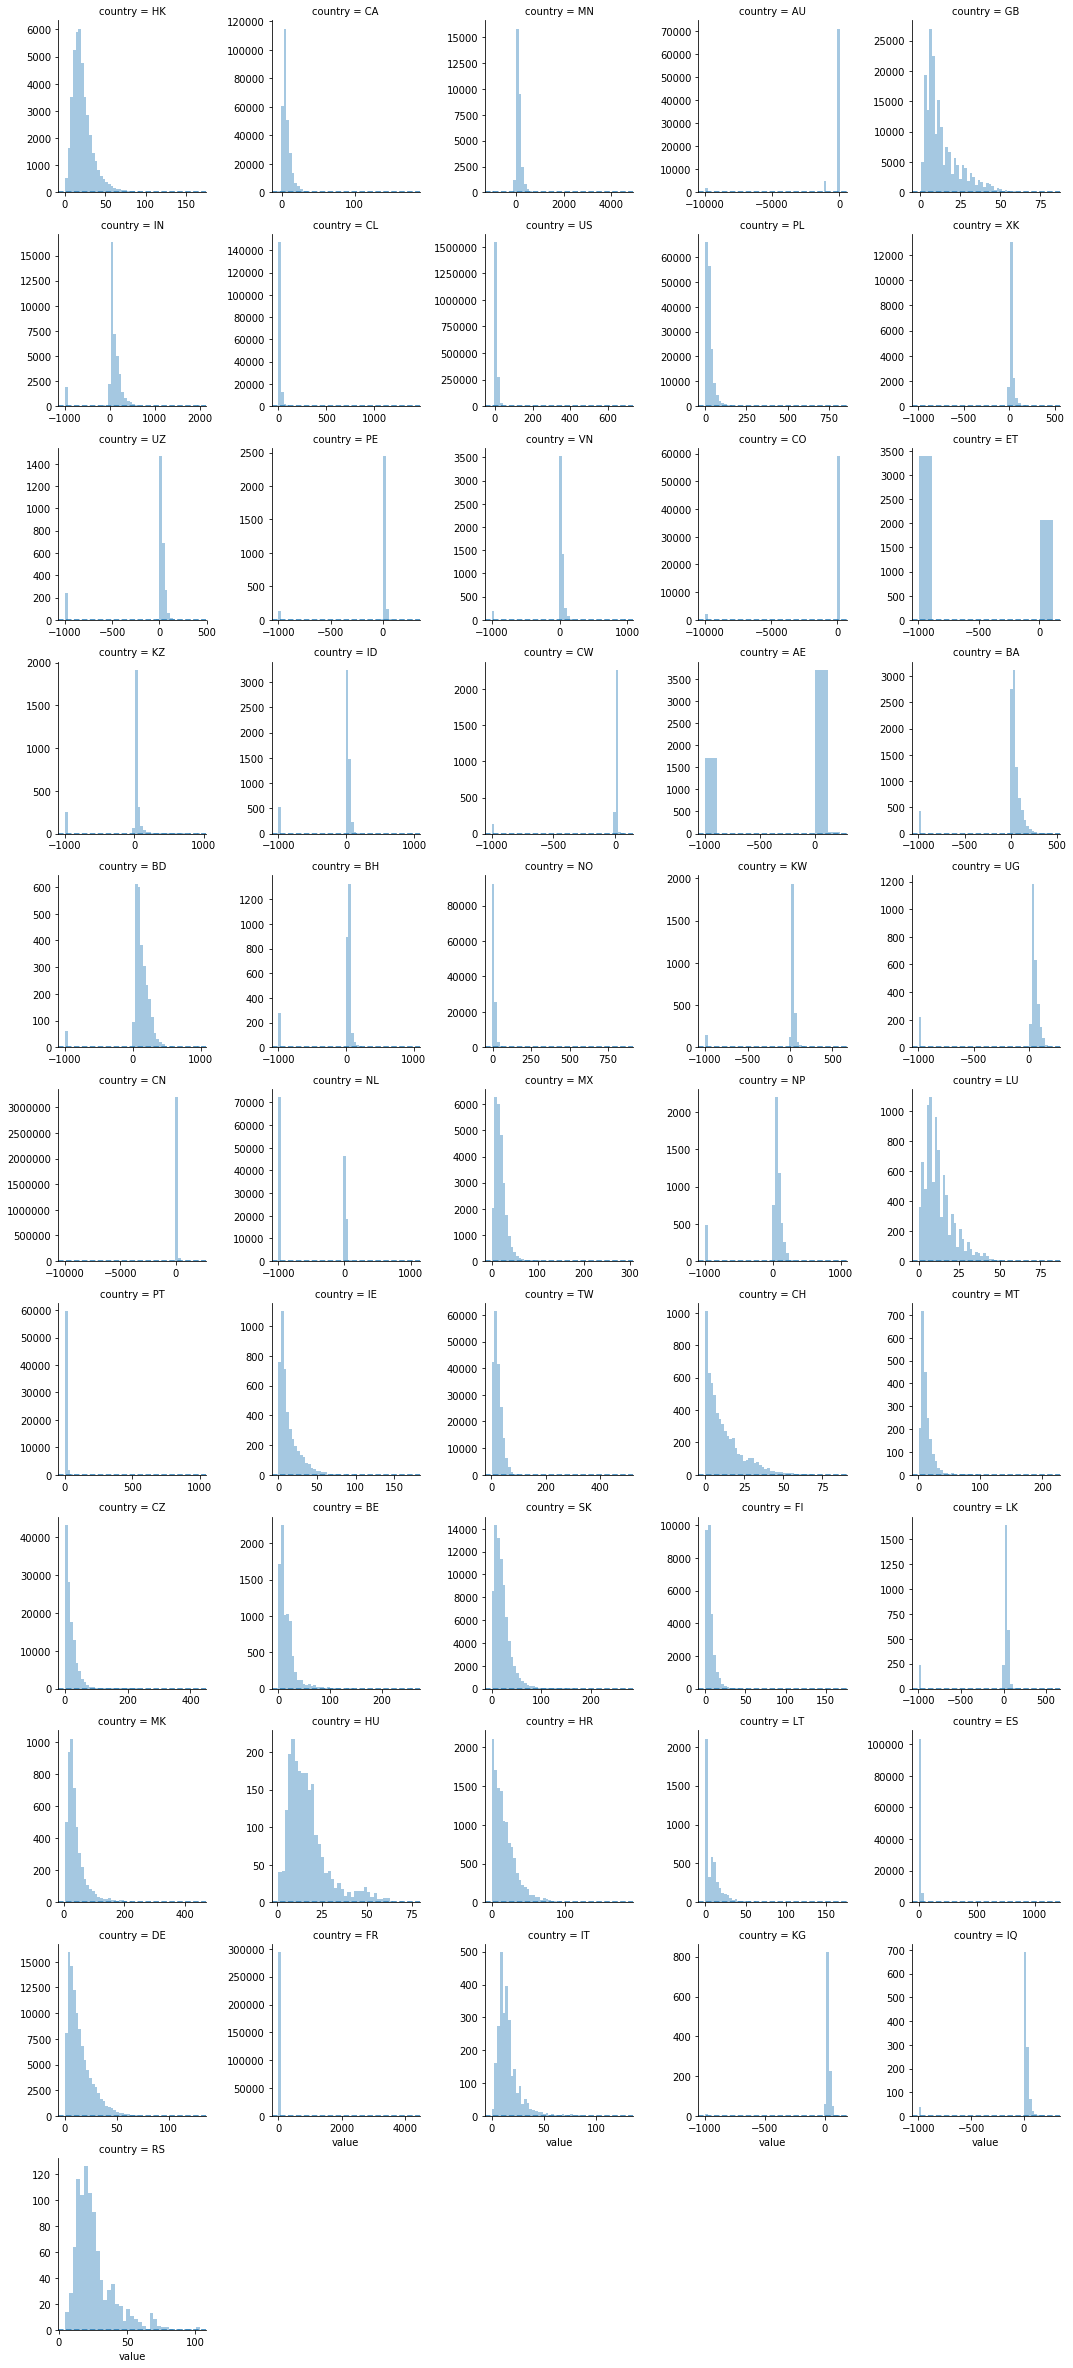

In [8]:
g = sns.FacetGrid(df, col="country", col_wrap=5, margin_titles=True, sharex=False, sharey=False)
g.map(sns.distplot, 'value', kde=False)
for ax in g.axes:
    ax.axhline(0, ls='--')
plt.show()

In [9]:
no_neg = df.where(df.value > 0,
         other=NaN)

Distribution of values after removing values <= 0

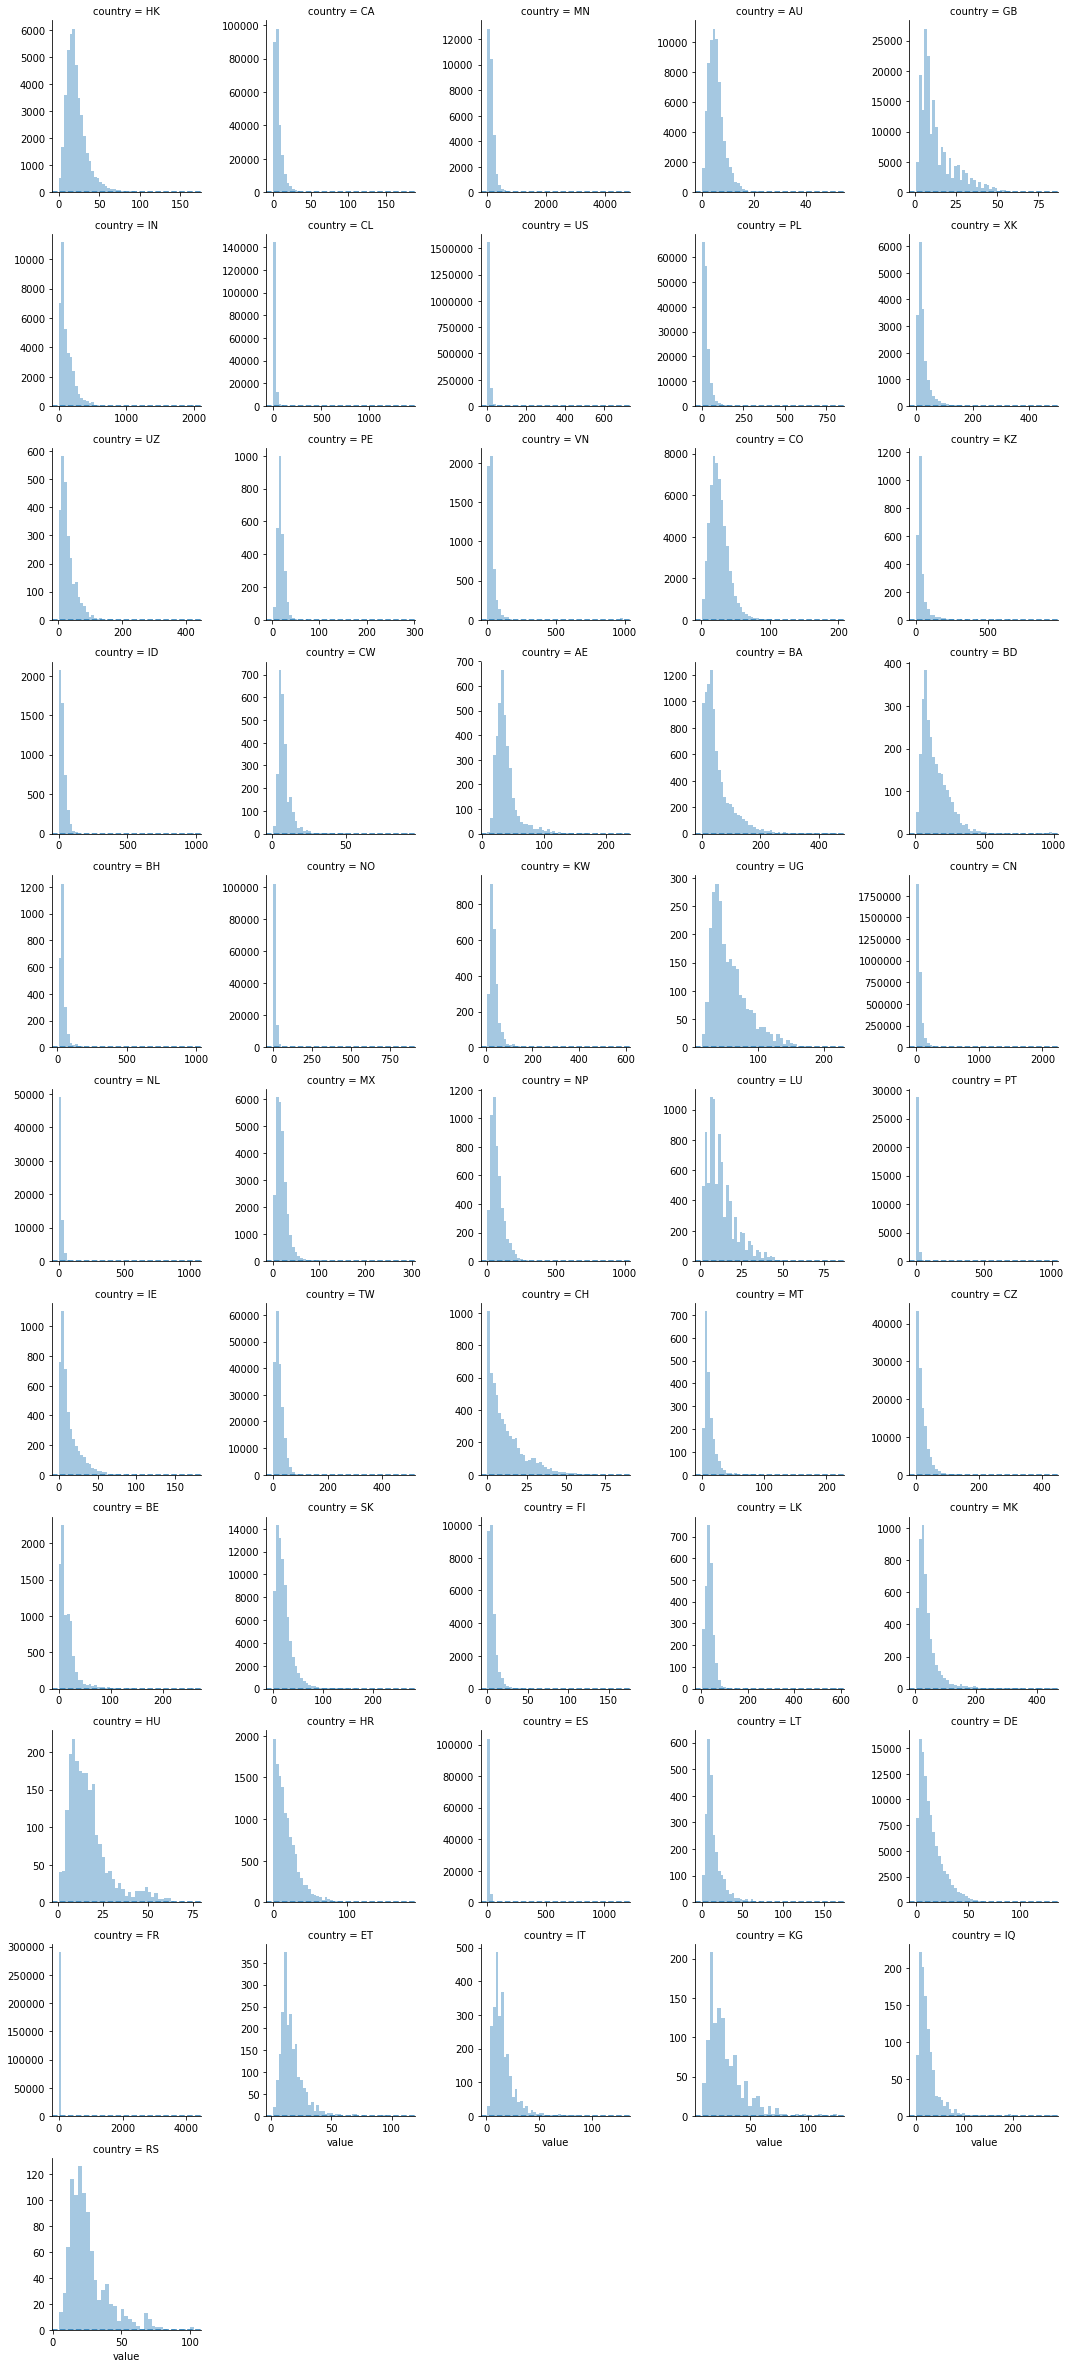

In [10]:
g = sns.FacetGrid(no_neg, col="country", col_wrap=5, margin_titles=True, sharex=False, sharey=False)
g.map(sns.distplot, 'value', kde=False)
for ax in g.axes:
    ax.axhline(0, ls='--')
plt.show()

In [11]:
avg_pm25_cty = no_neg.groupby('country')['value'].mean().sort_values().reset_index()

In [12]:
avg_pm25_cty['country_full_name'] = avg_pm25_cty.country.apply(get_full_country)

In [13]:
avg_pm25_cty

,country,value,country_full_name
0,AU,5.693776,Australia
1,FI,6.035413,Finland
2,CA,6.857884,Canada
3,US,7.654130,United States
4,PT,7.712320,Portugal
5,CW,8.597228,Curaçao
6,ES,9.615530,Spain
7,NO,9.658802,Norway
8,CH,12.061701,Switzerland
9,LU,12.632568,Luxembourg


In [14]:
avg_pm25_cty['code-country'] = avg_pm25_cty.country + '-' + avg_pm25_cty['country_full_name']

Average pm25 value for all the data (the global average)

In [15]:
global_avg = no_neg.value.mean()
global_avg

30.348122118191753

figure of pm25 values for each couuntry compared to each other and the global average

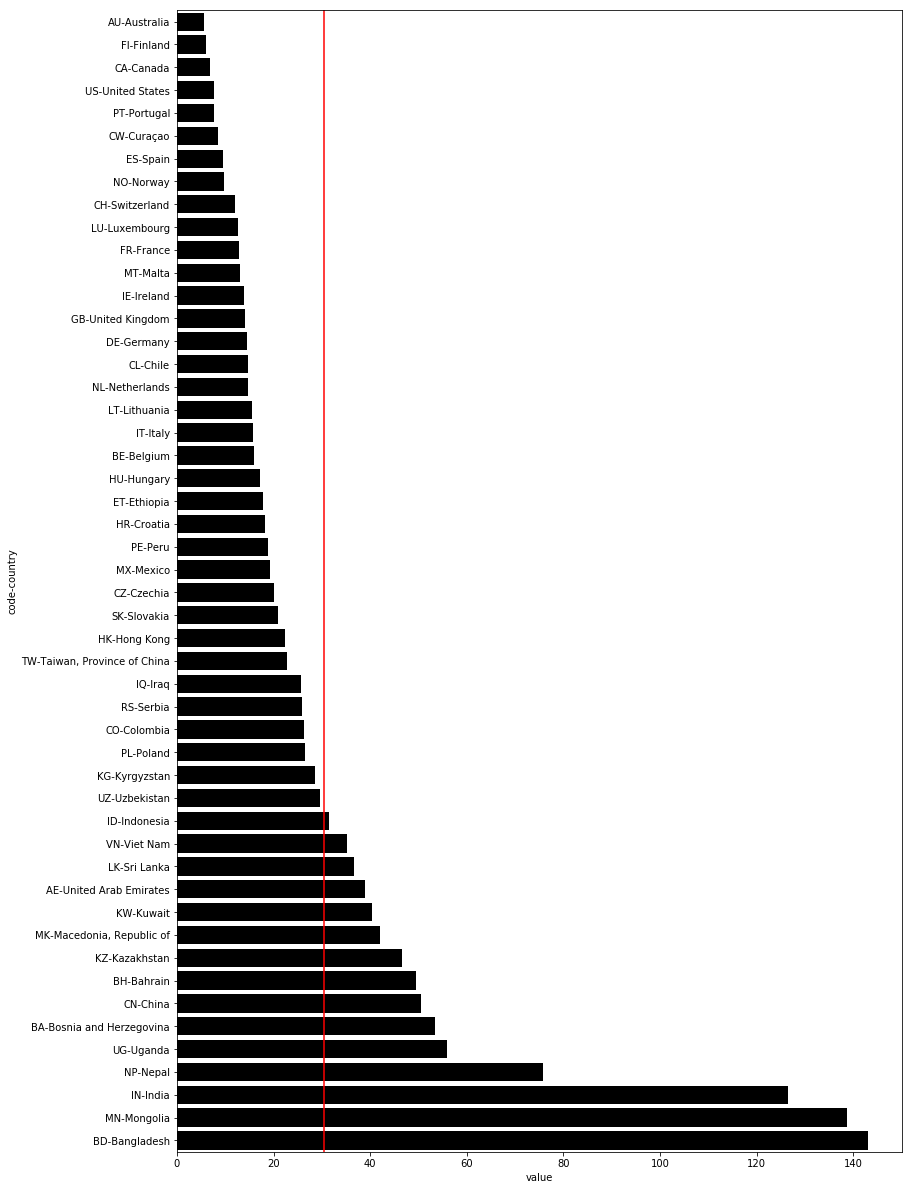

In [16]:
fig, ax = plt.subplots(1, 1, figsize=[13, 21])
sns.barplot(x = avg_pm25_cty.value, y = avg_pm25_cty['code-country'], color = 'black', ax=ax)
ax.axvline(global_avg, color='red')